# 12 Groundwater Dra wdown by Pumping

In [1]:
%load_ext pymatbridge

C:\Anaconda3\lib\site-packages\IPython\nbformat.py:13: ShimWarning: The `IPython.nbformat` package has been deprecated. You should import from nbformat instead.
  "You should import from nbformat instead.", ShimWarning)


Starting MATLAB on ZMQ socket tcp://127.0.0.1:22910
Send 'exit' command to kill the server
.......MATLAB started and connected!


## 12.1 Confined Aquifer

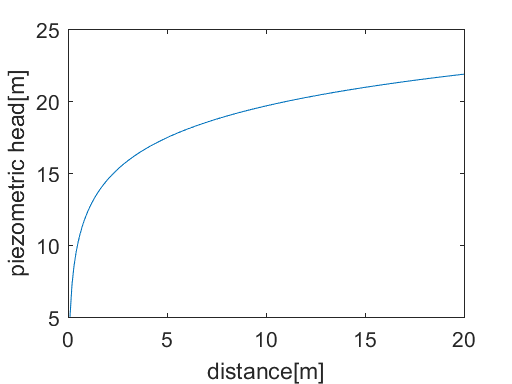

In [2]:
%%matlab
h0 = 5;
T = 5.e-6;
Q = 1.e-4;
r0 =0.1;

r = [0.1:0.1:20];
h = h0 + (Q/(2*pi*T))*log(r/r0);

plot(r, h);
ylabel('piezometric head[m]');
xlabel('distance[m]');

## 12.2 Unconfined Aquifer

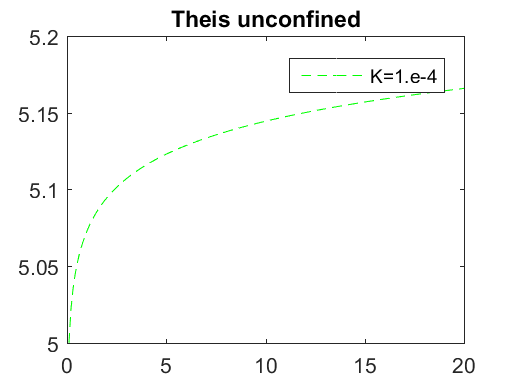

In [5]:
%%matlab
K = 1.e-4;
h = sqrt(h0*h0 + (Q/(pi*K))*log(r/r0));
plot(r, h, '--g');
hold on;
legend('K=1.e-4');
title('Theis unconfined');

## 12.3 Half-confined Aquifer

In [ ]:
# %load ch12/welldrawdown.m
function welldrawdown
% Well drawdown - comparison for confined / half-confined / unconfined
% aquifers
%    using analytocal solutions                   
%
%   $Ekkehard Holzbecher  $Date: 2006/04/30 $
%--------------------------------------------------------------------------
K = 1.1e-5;            % hydraulic conductivity
H = 10;                % depth
T = K*H;               % transmissivity
Q = 1.e-4;             % pumping rate
r0 = 0.1;              % well radius
s0 = -1.;               % drawdown in well
c = 0.8e8;             % resistance of half-permeable layer
R = 35;                % maximum radius

r = linspace (r0,R,100); 
hc = s0 + (Q/(2*pi*T))*log(r/r0);  
hu = -H + s0 + sqrt(H*H + (Q/(pi*K))*log(r/r0)); 
hh = -(Q/(2*pi*T))*besselk(0,r/sqrt(T*c));  

plot (r,hc,r,hh,r,hu);
legend ('confined','half-confined','unconfined')
xlabel ('distance [m]'); ylabel ('drawdown (neg) [m]');
title('Groundwater Drawdown due to Pumping')

## 12.4 Unsteady Drawdown and Well Function

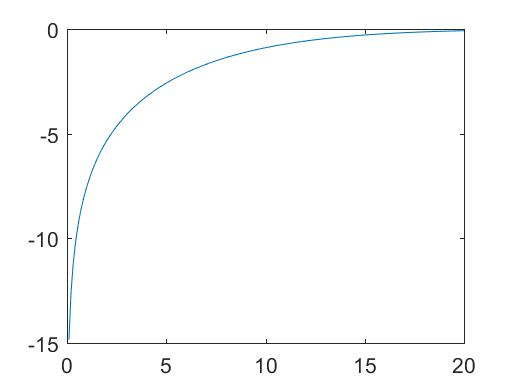

In [6]:
%%matlab
S = 0.1;
t = [1000000];

s = (Q/(4*pi*T)) * expint(S*r.*r/(4*T*t));
plot(r,-s);

## 12.5 Automatic Transmissivity Estimation

In [ ]:
# %load ch12/run_myfun.m
function run_myfun
global rfit sfit reach Q

rfit = [0.8 30 90 215];
sfit = [2.236 1.088 0.716 0.25];

Q = 788;
reach = 500;
T = 700;
T = fzero(@myfun,T);
T

function f = myfun(T)
global rfit sfit reach Q

% calculate Thiem solution
h = Q*log(rfit/reach)/T/2/pi;

% specify function f to vanish
f = (h+sfit) * h'/T;

In [ ]:
# %load ch12/thiem_test.m
function thiem_test
% determination of transmissivity  T                    Holzbecher October 2005
% using Thiem's solution
% and fzero for automatic estimation 
global rfit sfit reach Q 

% specify fitting data
rfit = [0.8 30 90 215];                     % observation well distance
sfit = [2.236 1.088 0.716 0.25];            % observated steady state drawdowns
Q = 788;                                    % pumping rate
rwell = 1;                                  % well radius
reach = 500;                                % reach
T = 500;                                    % guess for transmissivity
test = 0;                                   % test run flag  

% -------------------------------------------------------------------------
if test == 1               % input pumptest 'Oude Korendijk' 
    rfit = [0.8 30 90 215]; sfit = [2.236 1.088 0.716 0.25];       
    Q = 788; rwell = 0.5; T = 400; reach = 500;
end
options = optimset('Display','iter','TolFun',1e-8);
T = fzero(@myfun,T,options);
res = sum(Q*log(rfit/reach)/T/2/pi+sfit);
display (['Residual = ' num2str(res)]);
r = linspace (rwell,reach,100);
h = Q*log(r/reach)/T/2/pi;
plot (rfit,-sfit,'o',r,h,'-');
legend ('measured','ideally',4);
xlabel ('r'); ylabel ('h');
title ('Thiem Solution');
text (10*rwell,-0.1*max(sfit),['T = ' num2str(T)]);

function f = myfun(T) 
global rfit sfit reach Q

% calculate Thiem solution
h = Q*log(rfit/reach)/T/2/pi;

% specify function f to vanish
f = (h+sfit)*h'/T;

## References